In [33]:
import numpy as np
from numpy import pi, cos
from numpy.fft import fft, fftshift

import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid": True})

In [34]:
fs = 44100
ts = 1 / fs
t = np.arange(0, 1, 1 / fs)
f = np.arange(-fs / 2, fs / 2, 1)

f1 = 1000
t1 = 1 / f1
A1 = 1
x1_t = A1 * cos(2 * pi * f1 * t)
X1_f = fftshift(fft(x1_t))

b = 5
L = 2 ^ b
delta = (np.max(x1_t) - np.min(x1_t)) / L
levels = (x1_t + np.min(x1_t)) / delta
round_levels = np.round(levels)

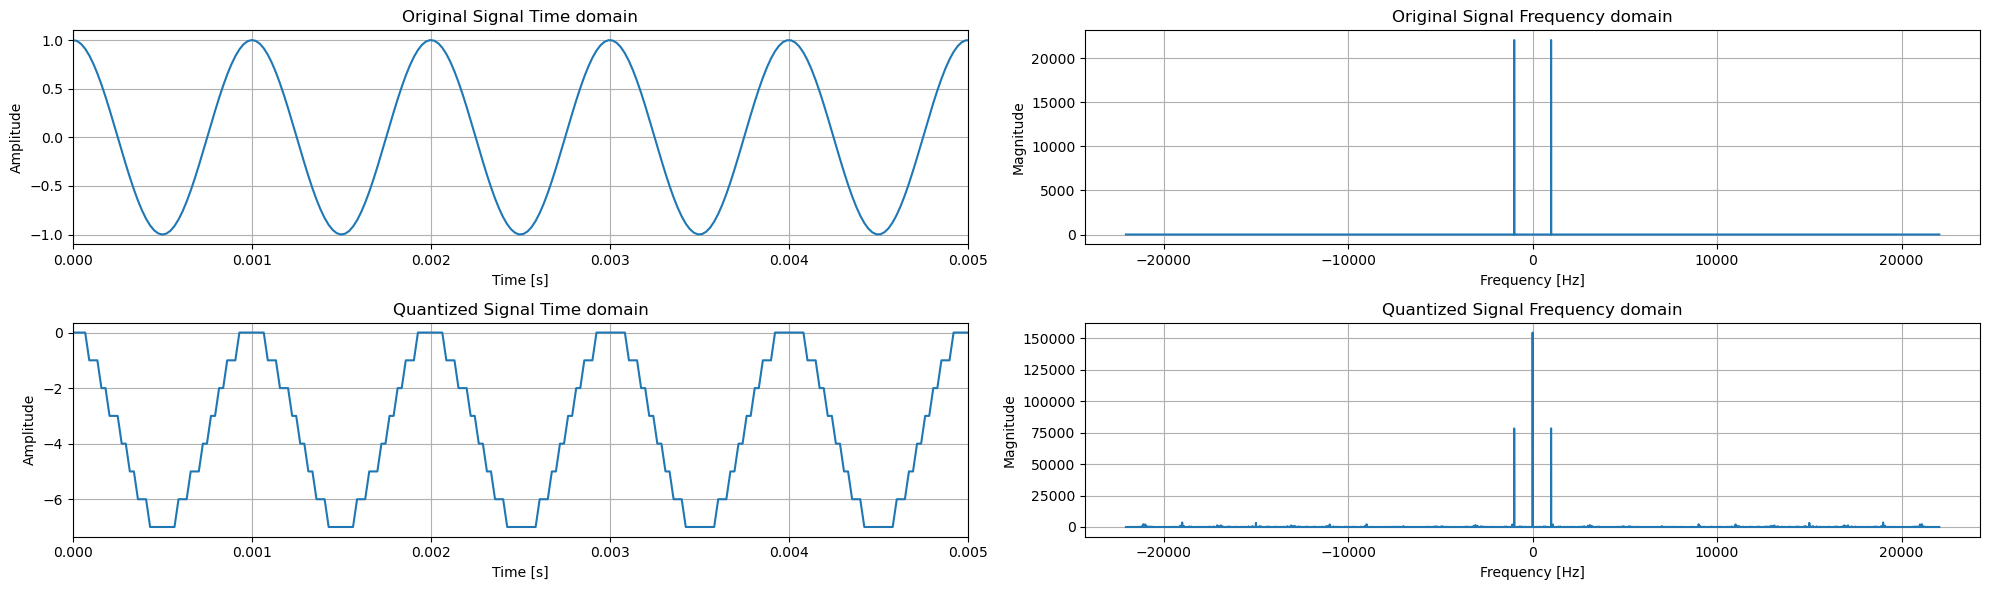

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))

axs[0, 0].plot(t, x1_t)
axs[0, 0].set_title("Original Signal Time domain")
axs[0, 0].set_xlabel("Time [s]")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].set_xlim(0, 5 * t1)

axs[0, 1].plot(f, np.abs(X1_f))
axs[0, 1].set_title("Original Signal Frequency domain")
axs[0, 1].set_xlabel("Frequency [Hz]")
axs[0, 1].set_ylabel("Magnitude")

axs[1, 0].plot(t, round_levels)
axs[1, 0].set_title("Quantized Signal Time domain")
axs[1, 0].set_xlabel("Time [s]")
axs[1, 0].set_ylabel("Amplitude")
axs[1, 0].set_xlim(0, 5 * t1)

axs[1, 1].plot(f, np.abs(fftshift(fft(round_levels))))
axs[1, 1].set_title("Quantized Signal Frequency domain")
axs[1, 1].set_xlabel("Frequency [Hz]")
axs[1, 1].set_ylabel("Magnitude")

plt.tight_layout()
plt.show()

In [47]:
bi = np.zeros((len(round_levels), b), dtype=int)
for i in range(len(round_levels)):
    bi[i] = np.array(
        [
            int(x)
            for x in np.binary_repr(
                int(round_levels[i]),
                width=b,
            )
        ],
        dtype=int,
    )
bi = bi.flatten()

N = 10
bi_up = np.repeat(bi, N)

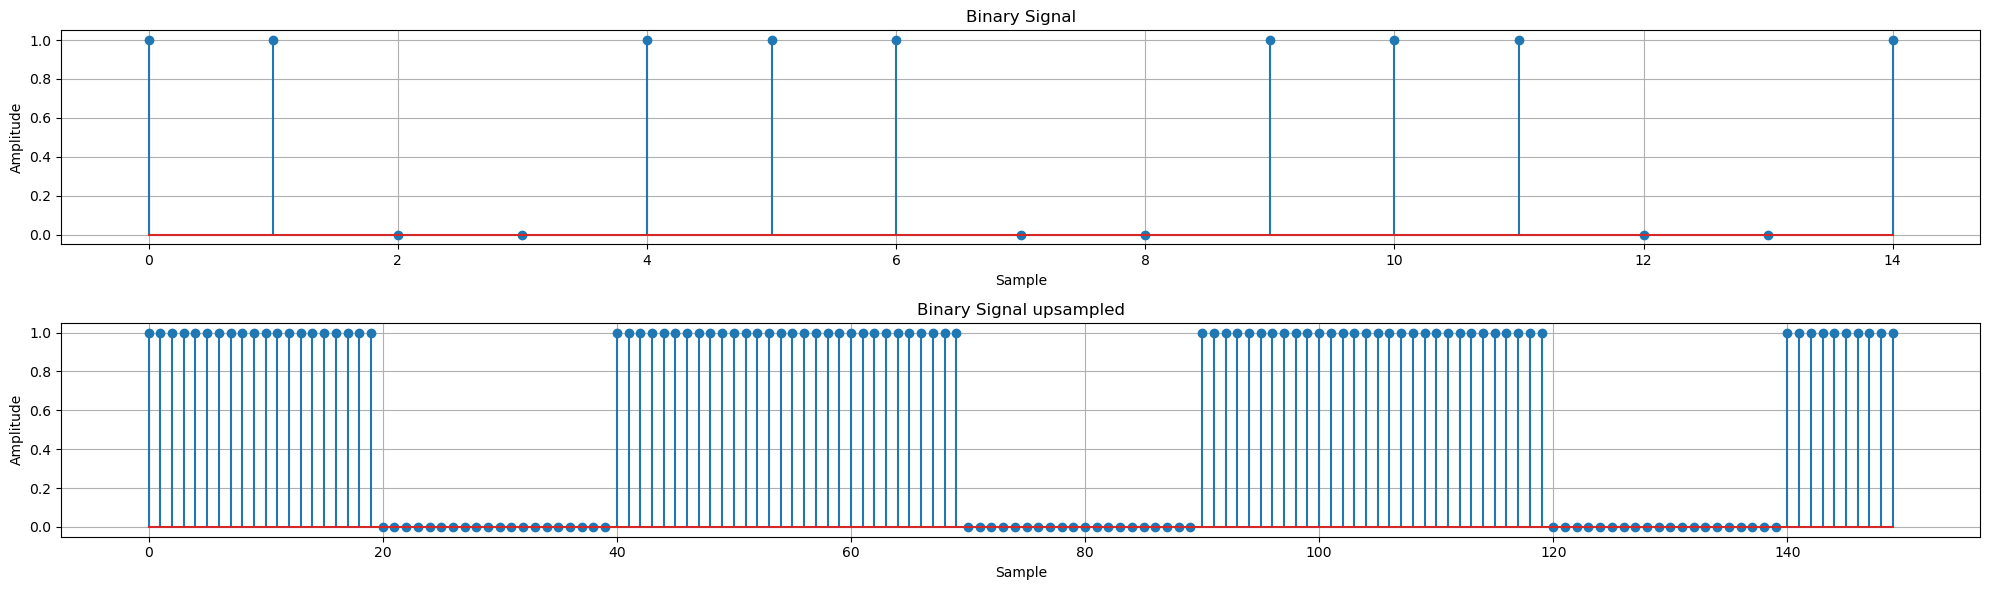

In [48]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 6))

start = 100
end = start + 15

bi_cut = bi[start:end]
axs[0].stem(bi_cut)
axs[0].set_title("Binary Signal")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")

bi_up_cut = bi_up[start * N : end * N]
axs[1].stem(bi_up_cut)
axs[1].set_title("Binary Signal upsampled")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

In [60]:
A = 5
nrz = (2 * A) * bi_up - A

noise = np.random.normal(0, 1, len(nrz))

nrz_noise = nrz + noise

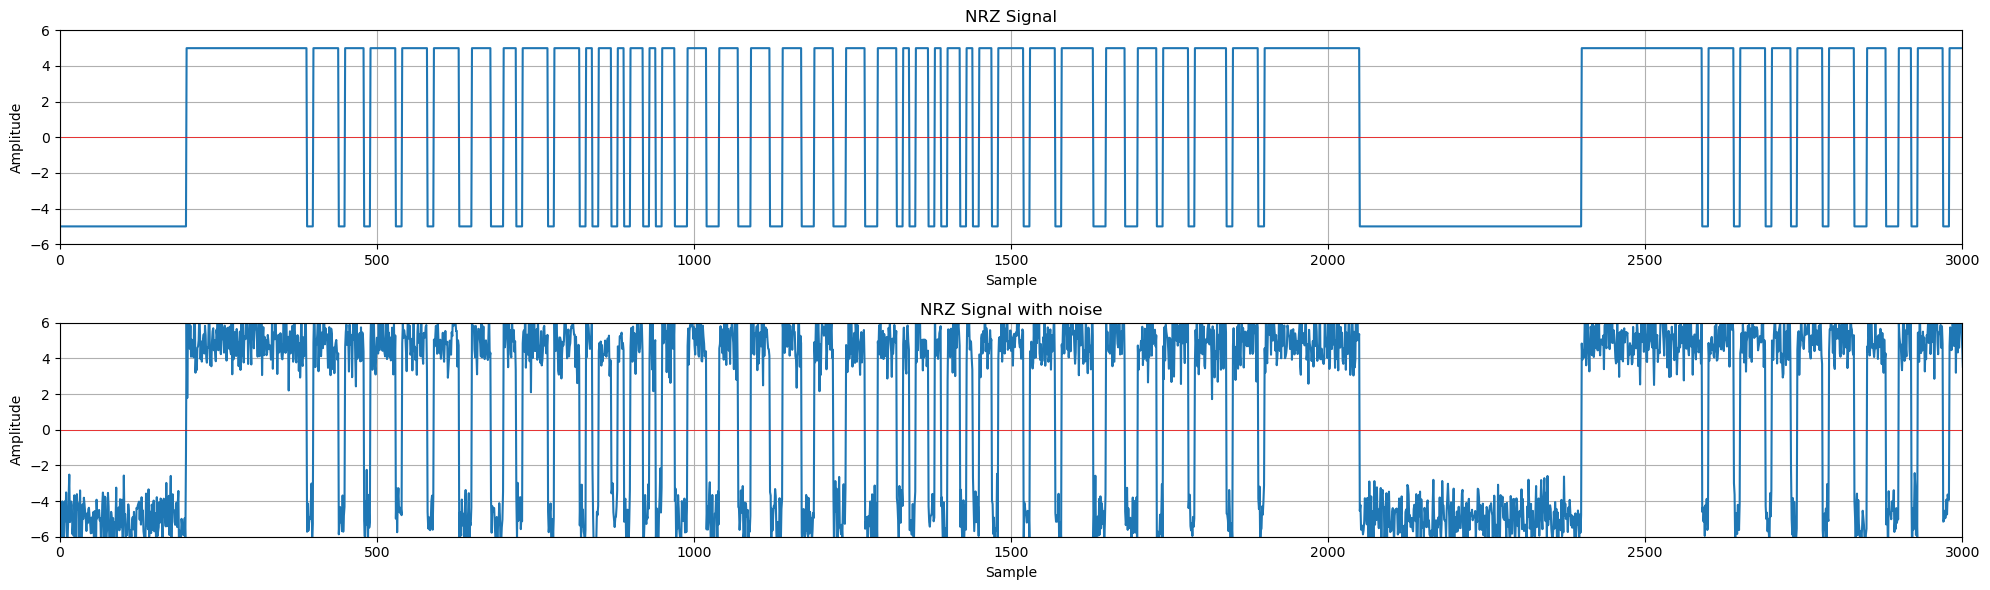

In [63]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 6))

axs[0].plot(nrz)
axs[0].set_title("NRZ Signal")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")
axs[0].set_ylim(-6, 6)
axs[0].set_xlim(0, 300 * N)
axs[0].axhline(0, color="r", linewidth=0.5)

axs[1].plot(nrz_noise)
axs[1].set_title("NRZ Signal with noise")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")
axs[1].set_ylim(-6, 6)
axs[1].set_xlim(0, 300 * N)
axs[1].axhline(0, color="r", linewidth=0.5)

plt.tight_layout()
plt.show()